#Principal Component Analysis

ML Lab 4

PCA

---



Vemula Ananya

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load dataset
data = pd.read_csv('TitanicDataset.csv')

In [ ]:
data['SibSp']

,SibSp
0,1
1,1
2,0
3,1
4,0
...,...
886,0
887,0
888,1
889,0


In [ ]:
data['Sex']

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [ ]:
data['Parch']

,Parch
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,2
889,0


In [ ]:
# Feature engineering
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex'
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)  # One-hot encode 'Embarked'

In [ ]:
data['FamilySize']

,FamilySize
0,2
1,2
2,1
3,2
4,1
...,...
886,1
887,1
888,4
889,1


In [ ]:
data['IsAlone']

,IsAlone
0,0
1,0
2,1
3,0
4,1
...,...
886,1
887,1
888,0
889,1


In [ ]:
data['Sex']

,Sex
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [ ]:
print(data['Age'].isnull().sum())
print(data['Fare'].isnull().sum())

177
0


In [ ]:
# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [ ]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Convert to DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Survived'] = y  # Add survival status for visualization

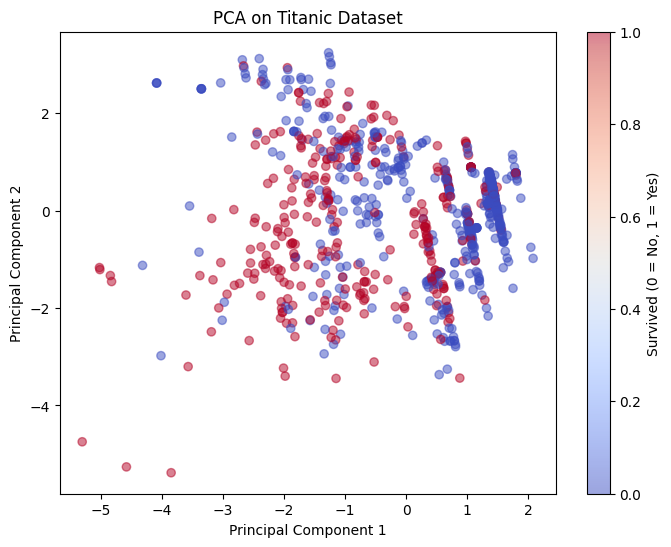

In [ ]:
# Plot PCA Results
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Survived'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Titanic Dataset')
plt.colorbar(label='Survived (0 = No, 1 = Yes)')
plt.show()

In [ ]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained Variance by PC2: {explained_variance[1]:.2f}")

Explained Variance by PC1: 0.27
Explained Variance by PC2: 0.21
